In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

In [3]:
train_dataset = datasets.FashionMNIST(root='./data', 
                            train=True, 
                            download=True,
                            transform=transform)

In [4]:
len(train_dataset)

60000

In [5]:
test_dataset = datasets.FashionMNIST(root='./data', 
                           train=False, 
                           download=True,
                           transform=transform)

In [6]:
len(test_dataset)

10000

In [7]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=32, 
                                           shuffle=True,
                                           num_workers=2)

In [8]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=32, 
                                          shuffle=False,
                                          num_workers=2)

Let's specify the list of the clothes categories 

In [9]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's look at a sample from the training dataset

In [10]:
def imshow(img):
    plt.figure(figsize=(10,8))
    plt.imshow(img.permute(1,2,0))

Get a sample from train_loader

In [11]:
image, labels = next(iter(train_loader))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


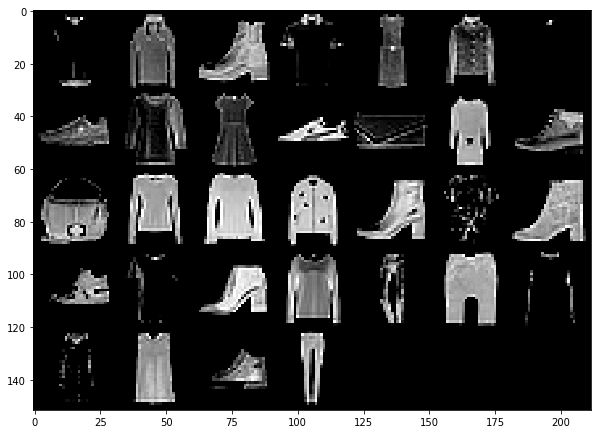

In [12]:
imshow(torchvision.utils.make_grid(image,nrow=7))

Let's look at the labels of the first 12 clothes:

In [13]:
print(list(classes[labels[j]] for j in range(12)))

['T-shirt/top', 'Pullover', 'Ankle boot', 'T-shirt/top', 'Dress', 'Coat', 'Shirt', 'Sneaker', 'T-shirt/top', 'Dress', 'Sneaker', 'Bag']


<h2>Building the network

In [18]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 convolution kernel, stride of 1 and padding of 2
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, padding=2, stride=1)
        self.conv2 = nn.Conv2d(in_channels=20, out_channels=50,kernel_size=5, padding=2, stride=1)
        # 4*4*50 input  features, 500 output features
        self.fc1 = nn.Linear(in_features=7*7*50, out_features=500, bias=True)
        self.fc2 = nn.Linear(in_features=500, out_features=10, bias=True)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), kernel_size=2, stride=2)
        x = F.max_pool2d(F.relu(self.conv2(x)), kernel_size=2, stride=2)
        # Flatten the 3d tensor to 1d tensor to feed to FC layer
        x = x.view(-1, 7*7*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x



In [19]:
net = Net()

In [20]:
print(net)

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (fc1): Linear(in_features=2450, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)


In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.01)

In [27]:

for i, data in enumerate(train_loader):
    images, labels = data

        # Zero out the gradient
        
    optimizer.zero_grad()
        
        # Forward pass
    outputs = net(images)

        # Compute the loss
    loss = criterion(outputs, labels)
        
        # Backward pass
    loss.backward()
       
         # Parameter update
    optimizer.step()

# print the loss value for every 1000 iteration
    if (i+1) % 1000 == 0:
            print ('epoch:{}, iter:{}, loss:{}'.format(epoch+1, i+1, loss.item()))

KeyboardInterrupt: 

<h2>Saving and loading the model 

In [ ]:
# Save the parameters
PATH = ''
net.save(model.state_dict(), PATH)

# Load the parameters
net = Net(..)
net.load_state_dict(model.load(Path))

# Set to testing mode
net.eval()

<h2>the model's performance on testing data 

In [ ]:
correct = 0
total = 0
with torch.no_grad() :
    for images, labels in test_loader:
        images, labels = data 
        outputs = net (images)
        # Get the index of high 
        _, predicted = outputs.max(dim=1)
        total += labels.size(0)
        #If the prediction matches the provided label
        correct += (predicted == labels).sum()
print('Test Accuracy of the model on the 10000 test images:{}'.format(100 * correct / total))

<h2> Visualize the training and testing  loss

In [ ]:
losses_in_epochs = losses[0::600]
plt.xkcd();
plt.xlabel('Epoch #');
plt.ylabel('Loss');
plt.plot(losses_in_epochs);
plt.show()

In [ ]:
t = torch.rand(1,3)
t.squeeze().shape

In [ ]:
t = torch.rand(6,1)
t.reshape(3,2).shape

In [ ]:
t = torch.rand(3,2)
t.unsqeeze(dim=0).shape

In [ ]:
t = torch.rand(3,2)
t.view(-1,6).shape

In [ ]:
t = torch.rand(6,2,2)
t.flatten().shape

In [42]:
A = torch.tensor((3), dtype=torch.float32, requires_grad=True)
A

tensor(3., requires_grad=True)

In [43]:
B = torch.tensor((2), dtype=torch.float32, requires_grad=True)
B

tensor(2., requires_grad=True)

In [44]:
C = A * B

In [45]:
C

tensor(6., grad_fn=<MulBackward0>)

In [46]:
D = torch.tensor((4), dtype=torch.float32, requires_grad=True)

In [47]:
D

tensor(4., requires_grad=True)

In [48]:
L = C + D
L

tensor(10., grad_fn=<AddBackward0>)

In [49]:
L.backward()

In [50]:
A.grad

tensor(2.)

In [51]:
B.grad

tensor(3.)

In [52]:
D.grad

tensor(1.)